In [202]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
from countryinfo import CountryInfo
warnings.filterwarnings('ignore')
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [203]:
data = pd.read_csv("data/2019.csv")

In [204]:
most=data.head()

In [205]:
least=data.tail()

In [206]:
d=[]
d=data.iloc[[0,155]]

In [207]:
d

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


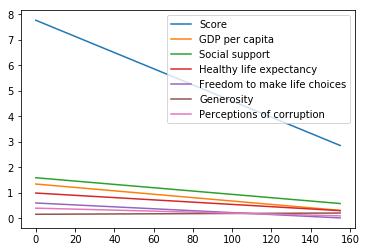

In [208]:

#d= d.loc[['Overall rank','Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
data_plot = d.loc[:,['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
data_plot.plot()


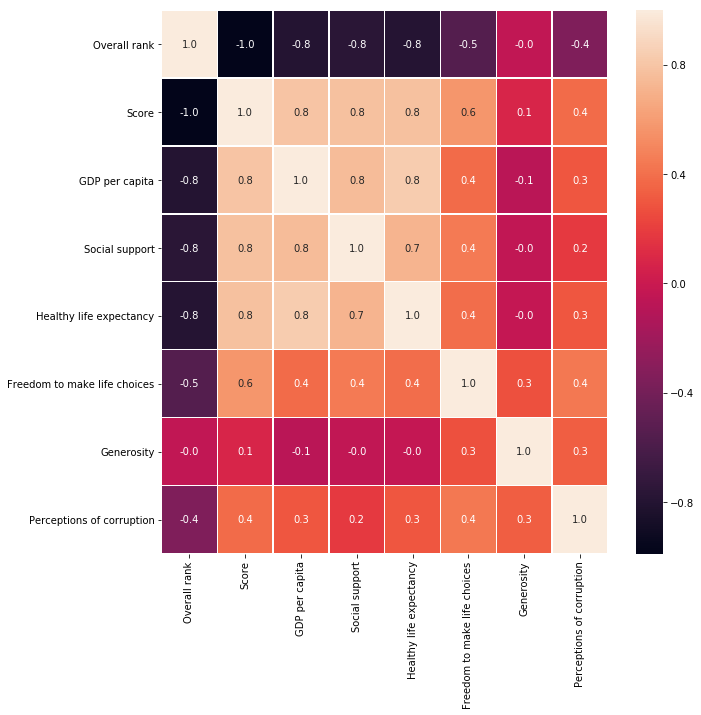

In [209]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
f.savefig("CorrPlot.jpg")

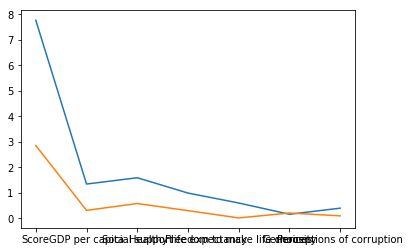

In [210]:
plt.plot(data_plot.iloc[0])
plt.plot(data_plot.iloc[1])


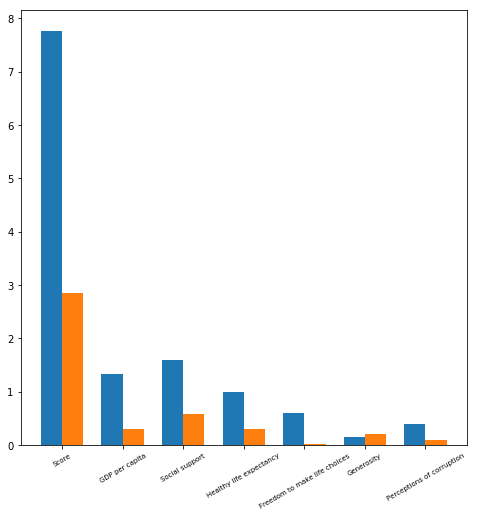

In [211]:
fig, ax = plt.subplots(figsize=(8,8))
width=0.35
labels=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, data_plot.iloc[0], width, label='Most happy country')
rects2 = ax.bar(x + width/2, data_plot.iloc[1], width, label='Least happy country')
plt.xticks(x, labels, fontsize=7, rotation=30)
fig.show()
fig.savefig("HappyVSUnhappy.jpg")

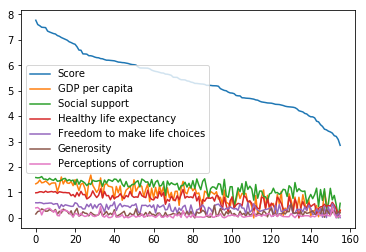

In [212]:
data_plot = data.loc[:,['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

data_plot.plot().get_figure().savefig('AllParamsPlotAllData.jpg')


In [213]:
countries= data['Country or region']
#countries=pd.DataFrame(countries)
region=[]
for c in countries:
    try:
        region.append(CountryInfo(c).region())
    except:
        region.append(' ')
        


In [214]:
countries=pd.DataFrame(countries)
scores=list(data['Score'])
#scores=scores.to_frame()


In [215]:
len(scores)

156

In [216]:
countries.insert(1, 'Region', region, allow_duplicates = True)
countries.insert(0,'Score',scores,allow_duplicates=True)

In [217]:
countries=countries[countries['Region']!=' ']

In [218]:
len(countries)

145

In [219]:
c1=countries.groupby('Region')['Score'].sum()

In [220]:
c1

Region
Africa      182.827
Americas    133.021
Asia        221.404
Europe      234.508
Oceania      14.535
Name: Score, dtype: float64

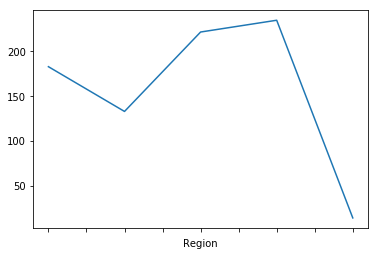

In [221]:
c1.plot()
c1=c1.to_frame()

In [222]:
reg=['Africa','Americas','Asia','Europe','Oceania']

In [223]:
c1['Score']

Region
Africa      182.827
Americas    133.021
Asia        221.404
Europe      234.508
Oceania      14.535
Name: Score, dtype: float64

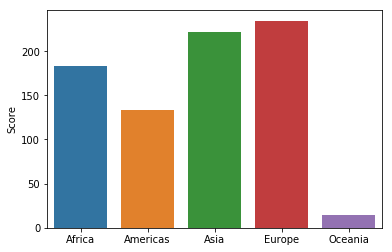

In [224]:
fig=sns.barplot(x=reg,y=c1['Score'])
fig.figure.savefig('CountryWise.jpg')


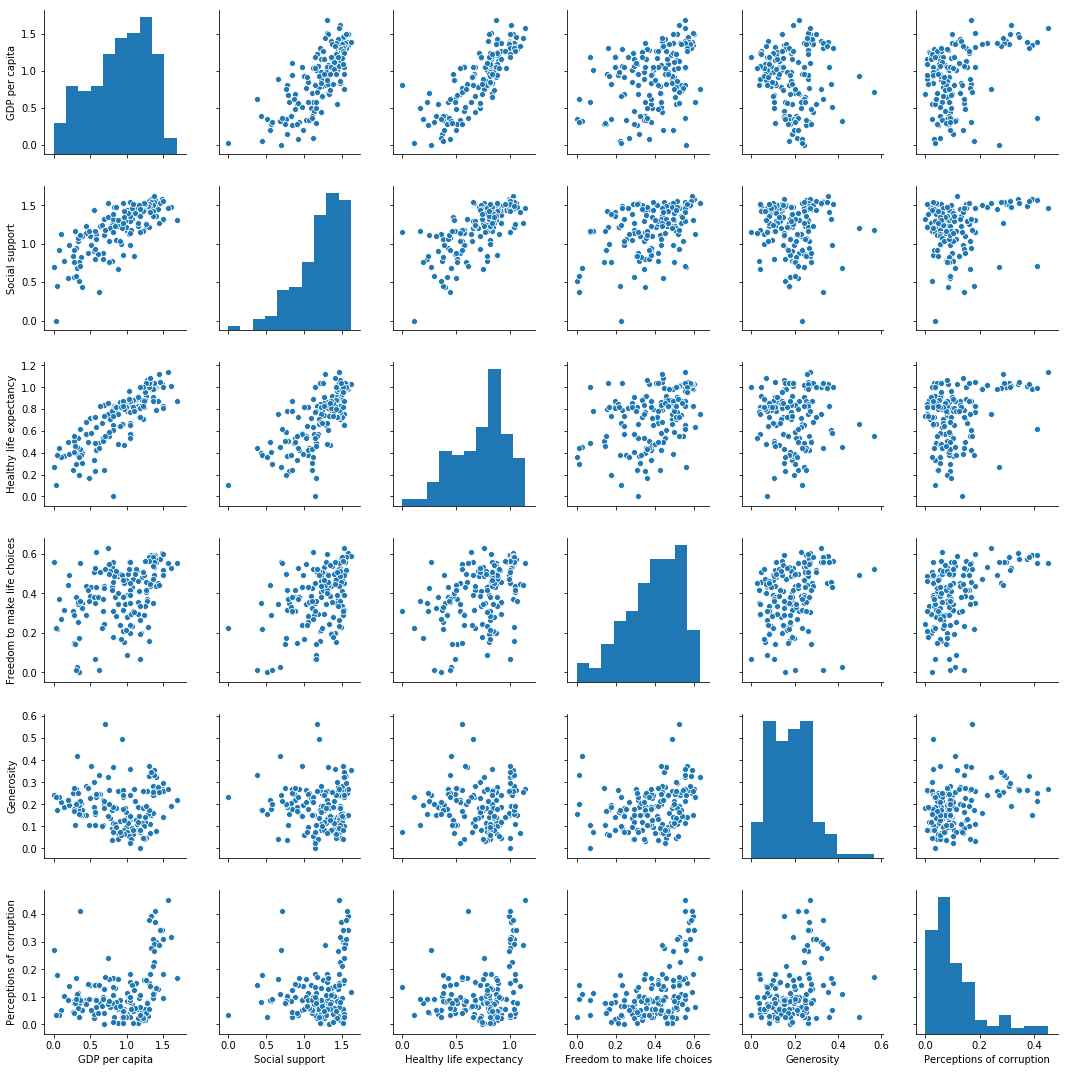

In [225]:
fig=sns.pairplot(data.iloc[:,[1,3,4,5,6,7,8]])
fig.savefig('PairPlot.jpg')

plt.show()


In [185]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [226]:
happiness_score = data['Score'].astype(float)

In [227]:
data1 = [dict(
        type='choropleth',
        colorscale = 'Rainbow',
        locations = data['Country or region'],
        z = happiness_score,
        locationmode = 'country names',
        text = data['Country or region'],
        colorbar = dict(
        title = 'Happiness Score', 
        titlefont=dict(size=25),
        tickfont=dict(size=18))
)]
layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data1, layout = layout)
fig=iplot(choromap, validate=False)
choromap.savefig('world.jpg')


AttributeError: 'Figure' object has no attribute 'savefig'

In [197]:
choromap

In [201]:
choromap.write_image("WorldMapScore.png")